# 第二章时间序列的预处理

## 1 导入库

In [1]:
import datetime
import pandas as pd
import numpy as np
import os
import matplotlib as  mpl

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号




习题数据="./习题与案例数据/习题数据/"
案例数据="./习题与案例数据/案例数据/"

In [2]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.api as sm

/Users/pengju/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


-------

-------
##  核心概念

### 1 ACF
####  随机变量${x_i}$的统计量：均值、方差、协方差、协方差系数
- 均值 $EX=\frac{\Sigma_{i=1}^{n}x_i}{n}$ 

- 方差 $DX=E(x-EX)^2$

- 协方差 $Cov(x,y)=E(x-EX)(y-EY)$

- 协方差系数 $\rho=\frac{Cov(x,y)}{\sqrt{DX DY}}$

#### 序列$\{{x_t}\}$的的统计量：均值、方差、自协方差函数、自协方差系数

- 均值 $EX_t=\frac{\Sigma_{i=1}^{n}x_i}{n}$ 

- 方差 $DX_s=E(x_s-EX_s)^2$

- 自协方差函数 $\gamma(k,s)=E(x_k-EX_k)(x_s-EX_s)$

- 自协方差系数 $\rho=\frac{\gamma(k,s)}{\sqrt{DX_k \bullet Dx_s}}$


#### 宽平稳时间序列

- 定义： 
     - 均值不变 $EX_t=\mu $
     - 自协方差函数和自协方差系数与起点无关 $\gamma(t-s)=\gamma(s,t)=\gamma(k,k+t-s)$
     - $\gamma(0)=\gamma(k,k)=E(x_k-EX_k)(x_k-EX_k)=DX_k$

#### 如何使用numpy实现ACF 计算的思路(参考 statsmodels.tsa.stattools.acf)
- numpy.correlate 基于C语言实现了卷积的方法，非常高效
- [自协方差函数] = numpy.correlate(x,x)/len(x)[x-1:]
- 自协方差系数=[自协方差函数]/[自协方差函数][0] 






In [3]:
# 自定义实现acf函数
def my_acf(ts,nlags=40):
    ts=ts.values.flatten()
    ts=ts-ts.mean()
    cov=(np.correlate(ts,ts,mode='full')/len(ts))[len(ts)-1:]
    return (cov/cov[0])[:nlags+1]

-------

-------

## 例题
### 例2-1

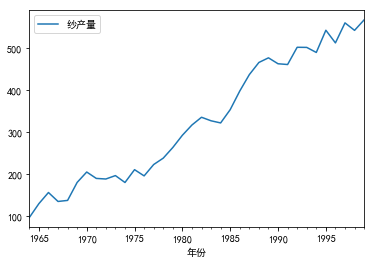

In [4]:
纱年产量=pd.read_excel(os.path.join(案例数据,"附录1.4.xls"),date_parser='年份')
纱年产量['年份']=pd.to_datetime(纱年产量['年份'],format='%Y')
纱年产量.set_index('年份',inplace=True)
纱年产量.plot()
plt.show()

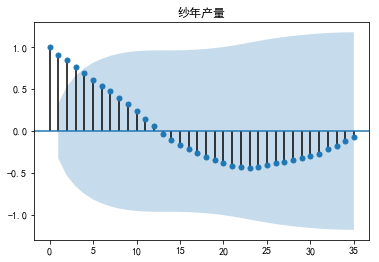

       自相关系数
0   1.000000
1   0.913922
2   0.843423
3   0.767194
4   0.695449
5   0.608744
6   0.543779
7   0.476306
8   0.395434
9   0.320923
10  0.242057
       自相关系数
0   1.000000
1   0.913922
2   0.843423
3   0.767194
4   0.695449
5   0.608744
6   0.543779
7   0.476306
8   0.395434
9   0.320923
10  0.242057


In [5]:
# 方法1: 使用statsmodel带的方法进行展示
sm.graphics.tsa.plot_acf(纱年产量)
plt.title("纱年产量")
plt.show()
print(pd.DataFrame(acf(纱年产量,nlags=10),columns=['自相关系数']))
print(pd.DataFrame(my_acf(纱年产量,nlags=10),columns=['自相关系数']))

### 例2-2

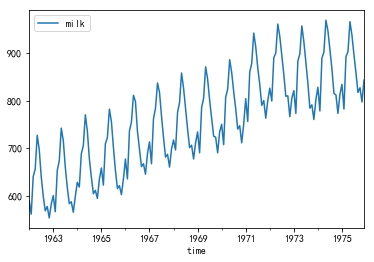

In [6]:
奶牛产量=pd.read_excel(os.path.join(案例数据,"附录1.5.xlsx")).set_index('time')
奶牛产量.index=pd.to_datetime(奶牛产量.index)
奶牛产量.plot()
plt.show()

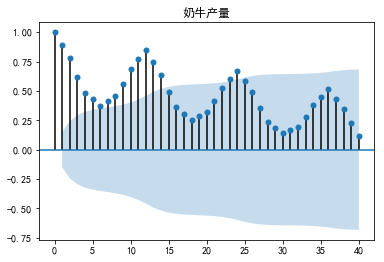

      自相关系数
0  1.000000
1  0.891574
2  0.778179
3  0.620271
4  0.486664
5  0.428148
      自相关系数
0  1.000000
1  0.891574
2  0.778179
3  0.620271
4  0.486664
5  0.428148


In [7]:
sm.graphics.tsa.plot_acf(奶牛产量,lags=40)
plt.title("奶牛产量")
plt.show()
print(pd.DataFrame(acf(奶牛产量,nlags=5),columns=['自相关系数']))
print(pd.DataFrame(my_acf(奶牛产量,nlags=5),columns=['自相关系数']))

## 例2-3 

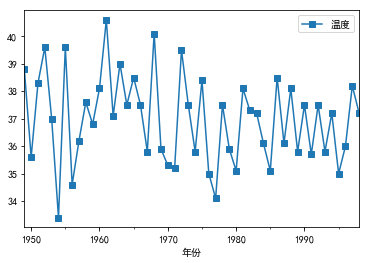

In [8]:
北京气温=pd.read_excel(os.path.join(案例数据,"附录1.6.xls")).set_index("年份")
北京气温.index=pd.to_datetime(北京气温.index,format='%Y')
北京气温.plot(marker='s')
plt.show()

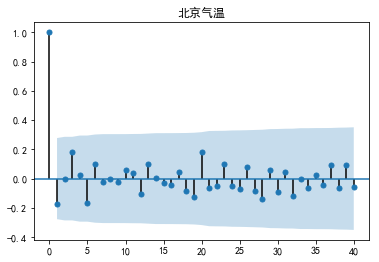

       自相关系数
0   1.000000
1  -0.175109
2  -0.003544
3   0.180263
4   0.023051
5  -0.164005
6   0.098658
7  -0.026292
8  -0.003241
9  -0.022279
10  0.057953
       自相关系数
0   1.000000
1  -0.175109
2  -0.003544
3   0.180263
4   0.023051
5  -0.164005
6   0.098658
7  -0.026292
8  -0.003241
9  -0.022279
10  0.057953
11  0.037150
12 -0.104218
13  0.101560
14  0.004308
15 -0.026947
16 -0.043058
17  0.046019
18 -0.083127
19 -0.128790
20  0.181778
21 -0.060919
22 -0.049990
23  0.098461
24 -0.051249
25 -0.071178
26  0.081606
27 -0.082270
28 -0.136652
29  0.055939
30 -0.088844
31  0.044420
32 -0.121728
33  0.000138
34 -0.063727
35  0.023212
36 -0.042600
37  0.093802
38 -0.061253
39  0.093533
40 -0.059586
41  0.013796
42  0.016552
43 -0.047804
44 -0.065266
45  0.039084
46 -0.000634
47 -0.024829
48  0.014832
49  0.003021


In [143]:
sm.graphics.tsa.plot_acf(北京气温,lags=40)
plt.title("北京气温")
plt.show()
print(pd.DataFrame(acf(北京气温,nlags=10),columns=['自相关系数']))
print(pd.DataFrame(my_acf(北京气温,nlags=len(北京气温)),columns=['自相关系数']))

## 例2-4 生成白噪音

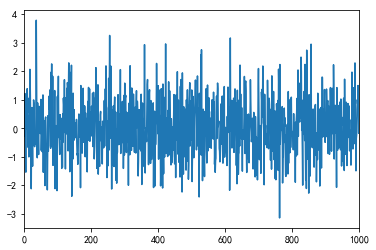

In [50]:
白噪音=pd.Series(np.random.normal(loc=0,scale=1,size=1000),name='白噪音')
白噪音.plot()
plt.show()

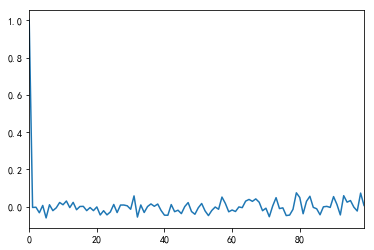

In [66]:
pd.Series(acf_白噪音).head(n=100).plot(t)
plt.show()

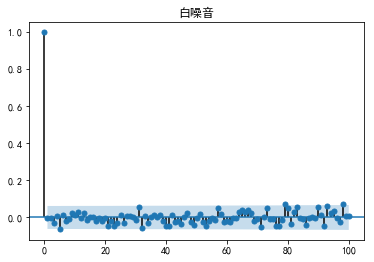

      自相关系数
0  1.000000
1 -0.003794
2 -0.002648
3 -0.032278
4  0.006988
5 -0.059897
6  0.010702
7 -0.020931
8 -0.005712
9  0.022807
      自相关系数
0  1.000000
1 -0.003794
2 -0.002648
3 -0.032278
4  0.006988
5 -0.059897
6  0.010702
7 -0.020931
8 -0.005712
9  0.022807


In [69]:
sm.graphics.tsa.plot_acf(白噪音,lags=100)
plt.title("白噪音")
plt.show()
print(pd.DataFrame(acf(白噪音,nlags=len(白噪音)),columns=['自相关系数']).head(n=10))
print(pd.DataFrame(my_acf(白噪音,nlags=len(白噪音)),columns=['自相关系数']).head(n=10))

acf_白噪音=acf(白噪音,nlags=len(白噪音))

In [70]:
print(acf_白噪音[1:].var()*len(acf_白噪音))

0.484709630744


### 纯随机性检验

#### Barllett 定理 
- 核心点： 告诉我们不同观察期数的自相关系数服从怎样的分布
- 延迟非零期的样本自相关系数近似服从均值为零，方差为序列期数导数的**正态分布**
    - $\rho_k   ~~ N(0,\frac{1}{n})$
    
#### LB 统计量   Ljung-Box
- 参考文献 [Thoughts on the Ljung-Box test](https://robjhyndman.com/hyndsight/ljung-box-test/) **讲述如何选择合适延迟期数**
    - 推荐值： 10（非周期序列） 2m(周期序列 m为周期)
- 基本思想：假设检验（假设不大于m期的序列值相互独立）（计算出对应自相关系数构成的Q统计量，判断是否大于显著性水平(0.05)）

In [110]:
#  对Barllett 定理 进行直观的验证
tmp_ts=pd.Series(np.random.normal(loc=0,scale=1,size=1000))
for i in range(1,4):
    acf_tmp=acf(tmp_ts[:10**i],nlags=10**i)
    print("n={:5,.0f}, var={:5,.4f},n*var={:6,.1f}".format(10**i,acf_tmp.var(),acf_tmp.var()*10**i))
    

n=   10, var=0.1387,n*var=   1.4
n=  100, var=0.0148,n*var=   1.5
n=1,000, var=0.0015,n*var=   1.5


In [28]:
# 自定义计算Q_LB
def my_Q_LB(rst_acf,nlags,olags=10):
 s   Q_LB=sum([nlags*(nlags+2)*i**2/(nlags-olags) for i in acf_tmp[1:olags]])
    
    return Q_LB
    


In [138]:
# 使用Q_LB进行白噪音假设
def my_Q_LB(ts,out_lags_list=[10],p_threshold=0.05):
    from scipy.stats  import  chi2
    n=len(ts)
    acf_ts=acf(ts,nlags=n)

    list_df=[]
    for l in out_lags_list:
        q_lb=sum([n*(n+2)*acf_ts[k]**2/(n-k)  for k in range(1,l+1) ])
        p=1- chi2.cdf(q_lb,l)
        tmp_l=[l,q_lb,p,p>p_threshold]
        list_df.append(tmp_l)

    df=pd.DataFrame(list_df,columns=['延迟期数','Q_LB统计量','P值','接受白噪音假设'])
    return df
    

In [139]:
out_lags_list=[6]
ts=白噪音

my_Q_LB(白噪音)


,延迟期数,Q_LB统计量,P值,接受白噪音假设
0,10,5.962833,0.818376,True


## 例2-5

## 例2-6

## 如何使用numpy计算acf




In [ ]:
np.correlate()

In [ ]:
sm.graphics.tsa.plot_acf(range(5))

In [ ]:
acovf(pd.Series(range(5)))

In [ ]:
np.cov( np.stack([pd.Series(range(5)),pd.Series(range())]))

In [ ]:
acf(pd.Series(range(5)))

In [ ]:
纱年产量

In [ ]:
# 自定义acf 自相关函数的计算
##01 获取矩阵

##02 获取均值

##03 获取方差

##04 获取协方差

##05 获取自相关系数


In [ ]:
ts=纱年产量.values.flatten()

In [ ]:
ts_mean=[ts[i:].mean() for i in range(ts.shape[0])]
ts_var=[ts[i:].std() for i in range(ts.shape[0])]

In [ ]:
np.cov((np.stack([ts-ts_mean[0],ts-ts_mean[0]],axis=0)))

In [ ]:
ts_var[0]**2

In [ ]:
pd.DataFrame(np.stack([ts-ts_mean[0],ts-ts_mean[0]],axis=1))

In [ ]:
ts_cov=[ np.cov(np.stack(ts-ts_mean[0],ts[i:]-ts_mean[i]),axis=0) for i in range(ts.shape[0])]

In [ ]:
i=0
np.cov(np.stack((ts-ts_mean[0],ts[i:]-ts_mean[i]),axis=0))

In [ ]:
ts

In [ ]:
np.cov(ts)

In [ ]:
def time_series_covariance(ts):
    

In [ ]:
ts.values.flatten()[10:]

In [ ]:
df=pd.DataFrame(columns=list(range(len(ts))))

In [ ]:
ts.values.flatten()[i:]

In [ ]:
ts.values.flatten()[i:]

In [ ]:
arrary=np.empty(shape=(len(ts),len(ts)))

In [ ]:
arrary[0]

In [ ]:
df=pd.DataFrame(np.zeros( shape=(len(ts),len(ts))),columns=list(range(len(ts))))
for i in range(len(ts)):
    


In [ ]:
df=pd.DataFrame(np.zeros( shape=(len(ts),len(ts))),columns=list(range(len(ts))))
for i in range(len(ts)):
    df.iloc[:len(ts)-i,i]=ts.values.flatten()[i:]

In [ ]:
# 构造矩阵


# 减去均值

# 计算方差

# 计算协方差
# 计算自相关系数

